In [ ]:
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Link onedrive(video penjelasan semua nomor): https://binusianorg-my.sharepoint.com/personal/nicholas_javier_binus_ac_id/_layouts/15/guestaccess.aspx?share=ER_SwVOgwr1GgVXre8eBkjQBs8GBPpUdQTa-12VatGVNXw

Link onedrive(backup): https://binusianorg-my.sharepoint.com/personal/nicholas_javier_binus_ac_id/_layouts/15/guestaccess.aspx?share=ER_SwVOgwr1GgVXre8eBkjQBs8GBPpUdQTa-12VatGVNXw&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=EZxLJy

Link youtube(video penjelasan semua nomor): https://youtu.be/IEJqxwOFtPM


# NIM - Nama - Kelas : 2502041956 - Nicholas Javier - LA05

## 2. [LO 1, LO 2, LO 3, LO4 35 points] You are a data scientist tasked with developing a sentiment analysis system for a hospital in Indonesia. This system aims to discern emotions from questionnaire responses. You have access to various datasets containing information such as Text and sentiment labels. These datasets are stored under the name “Emotion.csv”. The following are the specifications for this application:


### a. [LO 1, LO 2, LO 3, LO 4, 5 points] Perform Preprocess and prepare Dataset step, describe each step including some concepts in Natural Language Processing (NLP). & b. [LO 1, LO 2, LO 3, LO 4, 5 points] Divide the dataset into training, validation, and testing sets following these guidelines: allocate 70% of the data for training, 15% for validation, and 15% for testing.



In [ ]:
df = pd.read_csv('Emotion.csv')
df.head(5)

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
labelscount = df['label'].value_counts()
print(labelscount)

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: label, dtype: int64


<Axes: >

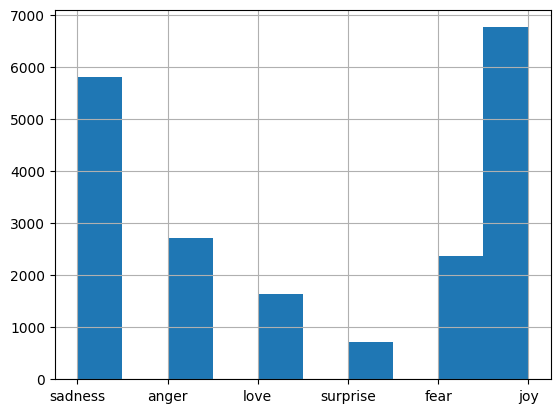

In [ ]:
df['label'].hist()

In [ ]:
train_df, test_val_df = train_test_split(df, test_size=0.3, random_state=95)
test_df, val_df = train_test_split(test_val_df, test_size=0.5, random_state=95)

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_length = 128

def tokenize_data(data_df):
    encodings = tokenizer(data_df['text'].tolist(), truncation=True, padding=True, max_length=max_length, return_tensors='tf')
    labels_encoded = pd.factorize(data_df['label'])[0]
    return tf.data.Dataset.from_tensor_slices((dict(encodings), labels_encoded)).batch(32)

train_dataset = tokenize_data(train_df)
val_dataset = tokenize_data(val_df)
test_dataset = tokenize_data(test_df)


The provided code utilizes the BERT (Bidirectional Encoder Representations from Transformers) tokenizer from the Hugging Face library to preprocess textual data for a classification task. After there is some tokenizer process of bert-base-uncased. The labels are encoded using pd.factorize to convert categorical labels into numerical format. The resulting datasets, namely train_dataset, val_dataset, and test_dataset, are then batched with a batch size of 32, ready for use in training and evaluating a BERT-based classification model.

### c. [LO 1, LO 2, LO 3, LO 4 15 points] Develop the model based on Table 1. Train your model based on the train dataset until achieving satisfactory accuracy

In [ ]:
num_labels = len(df['label'].unique())
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)
bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
bert_result = bert_model.fit(train_dataset,
                             epochs=7,
                             validation_data=val_dataset)

Epoch 1/7
438/438 [==============================] - 309s 597ms/step - loss: 2.1576 - accuracy: 0.3439 - val_loss: 2.7392 - val_accuracy: 0.3700
Epoch 2/7
438/438 [==============================] - 259s 590ms/step - loss: 1.7625 - accuracy: 0.5595 - val_loss: 3.6031 - val_accuracy: 0.4513
Epoch 3/7
438/438 [==============================] - 258s 590ms/step - loss: 1.5160 - accuracy: 0.6639 - val_loss: 3.2326 - val_accuracy: 0.5233
Epoch 4/7
438/438 [==============================] - 264s 602ms/step - loss: 1.5610 - accuracy: 0.6351 - val_loss: 4.3235 - val_accuracy: 0.4500
Epoch 5/7
438/438 [==============================] - 258s 590ms/step - loss: 1.0461 - accuracy: 0.7849 - val_loss: 6.1821 - val_accuracy: 0.4450
Epoch 6/7
438/438 [==============================] - 264s 603ms/step - loss: 0.6829 - accuracy: 0.8096 - val_loss: 6.5558 - val_accuracy: 0.4433
Epoch 7/7
438/438 [==============================] - 258s 589ms/step - loss: 0.5539 - accuracy: 0.8454 - val_loss: 7.8043 - val_ac

### d. . [LO 1, LO 2 & LO 3, LO 4 10 points] Performance analysis based on testing dataset (find precision, recall, F1-Score and accuracy) of the model and analysis the result.


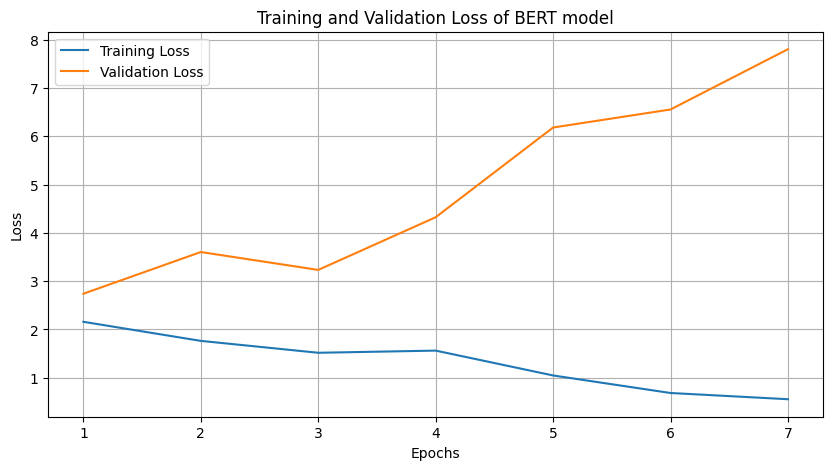

In [ ]:
def plot_training_history(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss of BERT model')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(bert_result)

Berikut merupakan training dan validation loss dari model BERT. Model ini terlihat overfitting karena berbentuk kebuka dimana training loss memiliki garis yang dibawah sementara validation loss yang terjadi mengarah naik keatas. Maka model ini dapat dibilang overfitting. Overfitting disebabkan ketika model menjadi terlalu terspesialisasi dalam mempelajari data pelatihan, menangkap noise dan fluktuasi yang tidak dapat digeneralisasi dengan baik pada data yang tidak terlihat. Maka dari itu, model dapat diubah dengan cara regularization, dropout, atau mengurangi kompleksibilitas dari model tersebut yang berbentuk overfitting.

In [ ]:
from sklearn.metrics import classification_report

predictions = bert_model.predict(test_dataset)
predicted_labels = np.argmax(predictions.logits, axis=1)

true_labels = np.concatenate([labels.numpy() for _, labels in test_dataset], axis=0)

report = classification_report(true_labels, predicted_labels, target_names=df['label'].unique())

print(report)


94/94 [==============================] - 15s 158ms/step
              precision    recall  f1-score   support

     sadness       0.00      0.01      0.00        95
       anger       0.01      0.03      0.01       237
        love       0.00      0.01      0.01       372
    surprise       0.02      0.01      0.01      1013
        fear       0.00      0.00      0.00       878
         joy       0.00      0.00      0.00       405

    accuracy                           0.01      3000
   macro avg       0.01      0.01      0.01      3000
weighted avg       0.01      0.01      0.01      3000



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

predictions = bert_model.predict(test_dataset)
predicted_labels = np.argmax(predictions.logits, axis=1)

true_labels = np.concatenate([labels.numpy() for _, labels in test_dataset], axis=0)
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')
accuracy = accuracy_score(true_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Accuracy:", accuracy)


94/94 [==============================] - 15s 156ms/step
Precision: 0.005663654392184939
Recall: 0.009082132384545834
F1-Score: 0.005291863938756094
Accuracy: 0.006333333333333333


Dari hasil yang saya dapatkan diatas,
Precision dengan angka (0.0566) merupakan hasil yang sangat rendah karena beberapa data tidak relevant dan cenderung lebih memiliki banyak false positive. Recall yang rendah karena adanya ketidakefektifan model yang terjadi. Untuk f1score yang sangat rendah dapat terjadi karena ketidakseimbangan terhadap metric yang diberikan. Akurasi yang rendah dapat terjadi karena adanya ketidakseimbangan kelas-kelas.

### Soal nilai tambahan

What is the difference between BERT and GPT? Explain it to me in max. 5 sentences

Perbedaan BERT dan GPT ada di beberapa aspeknya seperti tujuan learning, metode learning, output dari model itu sendiri. Perbedaan antara BERT dan GPT di tujuannya dimana BERT merupakan learning yang digunakan untuk memahami konteks 2 arah yaitu depan dan belakang sementara gpt merupakan learning untuk memprediksi kata yang akan keluar. Metode yang digunakan juga berbeda sehingga BERT menggunakan masked language modelling sementara GPT menggunakan generative modelling. Output dari kedua model juga berbeda dimana BERT hanya dapat mengeluarkan kata-kata dari konteks sebelumnya sedangkan GPT dapat mengeluarkan kata-kata dengan menciptakannya sehingga lebih ada kreatifitas dan inovasi dari GPT itu sendiri.